![ed-5](ed-5.png "Title")
<center><h1>The Lyrics of Ed Sheeran's Songs</h1></center>
<center><h2>A Data Visualisation Exercise</h2></center>

# Abstract
Ed Sheeran is one of the hottest artists today (2019). He is the second artist to have 4 songs [cross 1 billion streams on Spotify](https://www.forbes.com/sites/hughmcintyre/2019/01/18/ed-sheeran-is-the-second-musician-to-see-four-hits-reach-one-billion-streams-on-spotify/#23b5263e5319). In this exercise, I want to see his songwriting prowess, in particular the lyrics he uses in his songs. 

Most of his songs revolve around love like Perfect, Thinking Out Loud and Shape of You. Hence, I expect to see many words that are related to these themes.

# Data Collection
I collected lyrics of 167 songs that belong to Ed Sheeran. This includes all his EPs and album releases. 

In [1]:
import re
from collections import OrderedDict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

sns.set()

In [2]:
# Read from CSV file
df = pd.read_csv('ed-sheeran-lyrics-1.csv', sep='|')

## Data Cleaning

Let's take a look at one song, the one above. It's clear that there are many illegal characters that are not in So before starting to do some data analysis, let's normalise the data first. We will want to 

- encode all lyrics to `ASCII` and this will remove unwanted special characters
- change them all to lower case

This will be done in a simple `lambda` function.

In [3]:
print(df.iloc[6]['lyrics'])

   Just lay it all down on me Itâs getting harder for me to breathe Just want to know if it will be Just want to know if it is me  And you know Iâve learned from my mistakes And how much have I got to lose? You find my heart is hard to break Canât keep playing the fool  Breathe in, exhale To turn to move beyond the pale Flag up, set sail To find whatâs there beyond the pale  I feel like Iâve gone to the end of the world What do I have to do?  You know Iâve learned from my mistakes How much have I got to lose? You find my heart hard to break Canât keep playing the fool  Breathe in, exhale To turn to move beyond the pale Flag up, set sail To find whatâs there beyond the pale  What can I do Just to let you know That youâre in my mind? To try and justify The way you liberate me Every time 


In [4]:
# After cleaning
df['lyrics'] = df['lyrics'].apply(lambda x : x.encode('ascii', 'ignore').decode().lower().strip())
print(df.iloc[6]['lyrics'])

just lay it all down on me its getting harder for me to breathe just want to know if it will be just want to know if it is me  and you know ive learned from my mistakes and how much have i got to lose? you find my heart is hard to break cant keep playing the fool  breathe in, exhale to turn to move beyond the pale flag up, set sail to find whats there beyond the pale  i feel like ive gone to the end of the world what do i have to do?  you know ive learned from my mistakes how much have i got to lose? you find my heart hard to break cant keep playing the fool  breathe in, exhale to turn to move beyond the pale flag up, set sail to find whats there beyond the pale  what can i do just to let you know that youre in my mind? to try and justify the way you liberate me every time


Next, we want to remove all apostrophes from shortened words. This will be done using a `lambda` function, leveraging on the lookahead and lookbehind ability of regex.

In [5]:
print(df.iloc[1]['lyrics'])

well, i've walked this street well, i've walked this street before and everyone's locked up their door 'cos they heard me coming and i've been running from what i don't know if she's there or if she's cares it's taken you a long time to see you've got a goldfish memory this song's for you, not for me in misery you said we went too fast and you said we wouldn't last now i've put the past behind me and i'm running from what i don't know if she's there or if she cares it's taken you a long time to see you've got a goldfish memory this song's for you, not for me in misery it's taken you a long time to see in misery and everyone's locked up their door 'cos they heard me coming and i've been running from what i don't know if she's there or if she's cares it's taken you a long time to see you've got a goldfish memory this song's for you, not for me in misery you said we went too fast and you said we wouldn't last now i've put the past behind me and i'm running from what i don't know if she's 

In [6]:
df['lyrics'] = df['lyrics'].apply(lambda x : re.sub("(?<=[a-z])'(?=[a-z])", "", x))
print(df.iloc[1]['lyrics'])

well, ive walked this street well, ive walked this street before and everyones locked up their door 'cos they heard me coming and ive been running from what i dont know if shes there or if shes cares its taken you a long time to see youve got a goldfish memory this songs for you, not for me in misery you said we went too fast and you said we wouldnt last now ive put the past behind me and im running from what i dont know if shes there or if she cares its taken you a long time to see youve got a goldfish memory this songs for you, not for me in misery its taken you a long time to see in misery and everyones locked up their door 'cos they heard me coming and ive been running from what i dont know if shes there or if shes cares its taken you a long time to see youve got a goldfish memory this songs for you, not for me in misery you said we went too fast and you said we wouldnt last now ive put the past behind me and im running from what i dont know if shes there or if she cares its taken 

## Study 1 - Using `nltk`'s `word_tokenize` and `PorterStemmer()`
I performed the following steps for this study:
1. Use `word_tokenize` to get all the terms from all songs

2. Use `PorterStemmer()` to get the root form of all words

In [7]:
# Store the song lyrics as a list
lyrics_study1_songlist = df.copy()['lyrics'].tolist()

In [8]:
# The following is a demonstration of the workflow being used.
s1_raw_eg = lyrics_study1_songlist[4]
print(s1_raw_eg)

s2_eg = word_tokenize(s1_raw_eg)
print()
print(s2_eg)

stemmer = PorterStemmer()
s3_eg = [stemmer.stem(t) for t in s2_eg]
print()
print(s3_eg)

im standing on a mountain waiting for you to come you were sitting counting the days that i had gone the note i wrote i wrapped up in a cigarette burned away the memories i tried to forget but not yet wishing my life away but these three words i have to say to you my baby blue you know its true i love you i love you how can i tell you? i dont know what to say this chance that i wont miss but i miss you anyway i feel your pain its turning me insane thrown away i had to take the last train home  but then you came wishing my life away but these three words i have to say to you my baby blue you know its true i love you wishing my life away these three words i have to say to you my baby blue you know its true you know its true i love you i love you i love you

['im', 'standing', 'on', 'a', 'mountain', 'waiting', 'for', 'you', 'to', 'come', 'you', 'were', 'sitting', 'counting', 'the', 'days', 'that', 'i', 'had', 'gone', 'the', 'note', 'i', 'wrote', 'i', 'wrapped', 'up', 'in', 'a', 'cigarette

A few interesting things start to appear. Punctuation marks like `?` are considered one token. We should remove those (in other words, only preserve words. Hence, let's perform the tokenization step again.

Also, the stemming step is not useful to distinguish parts of the word so let's not use it.

In [9]:
s2_eg = [w for w in word_tokenize(s1_raw_eg) if re.search('\w', w) is not None]
print()
print(s2_eg)


['im', 'standing', 'on', 'a', 'mountain', 'waiting', 'for', 'you', 'to', 'come', 'you', 'were', 'sitting', 'counting', 'the', 'days', 'that', 'i', 'had', 'gone', 'the', 'note', 'i', 'wrote', 'i', 'wrapped', 'up', 'in', 'a', 'cigarette', 'burned', 'away', 'the', 'memories', 'i', 'tried', 'to', 'forget', 'but', 'not', 'yet', 'wishing', 'my', 'life', 'away', 'but', 'these', 'three', 'words', 'i', 'have', 'to', 'say', 'to', 'you', 'my', 'baby', 'blue', 'you', 'know', 'its', 'true', 'i', 'love', 'you', 'i', 'love', 'you', 'how', 'can', 'i', 'tell', 'you', 'i', 'dont', 'know', 'what', 'to', 'say', 'this', 'chance', 'that', 'i', 'wont', 'miss', 'but', 'i', 'miss', 'you', 'anyway', 'i', 'feel', 'your', 'pain', 'its', 'turning', 'me', 'insane', 'thrown', 'away', 'i', 'had', 'to', 'take', 'the', 'last', 'train', 'home', 'but', 'then', 'you', 'came', 'wishing', 'my', 'life', 'away', 'but', 'these', 'three', 'words', 'i', 'have', 'to', 'say', 'to', 'you', 'my', 'baby', 'blue', 'you', 'know', 'its

In [10]:
# Generate the string for creating the wordcloud

wc_string1 = ''
for song_raw in lyrics_study1_songlist[:]:

    song_tokenized = [w for w in word_tokenize(song_raw) if re.search('\w', w) is not None]
    wc_string1 = wc_string1 + ' '.join(song_tokenized)

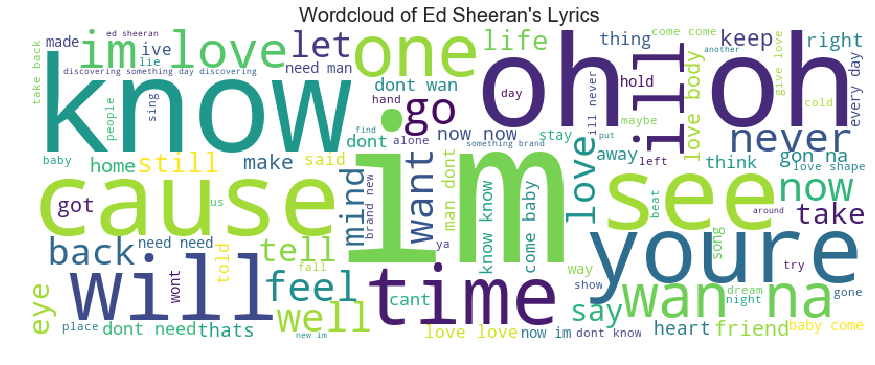

In [11]:
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(width=800, height=300, background_color="white", 
    max_words=100, relative_scaling = 0.8).generate(wc_string1)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=20)
plt.show()

## Study 1 - Digging Deeper
By observing the wordcloud, some positive and negative patterns emerge. 

The positives :
- relevant words like `know`, `love` have relatively large sizes, implying that they are frequently found in the lyrics. This is a positve sign!

Let's see what the words are and their corresponding probabilities.

In [12]:
# Get the word frequency as a dictionary
word_freq1 = desc_wordcloud.words_
word_freq_reps1 = []
for w in sorted(word_freq1, key=word_freq1.get, reverse=True):
    word_freq_reps1.append('%s : %0.2f' % (w, word_freq1[w]))
print(word_freq_reps1)

['im : 1.00', 'know : 0.73', 'oh oh : 0.68', 'cause : 0.53', 'see : 0.52', 'youre : 0.49', 'time : 0.46', 'will : 0.46', 'one : 0.44', 'ill : 0.41', 'wan na : 0.40', 'im love : 0.40', 'go : 0.35', 'never : 0.31', 'now : 0.31', 'feel : 0.30', 'well : 0.29', 'want : 0.29', 'love : 0.28', 'back : 0.28', 'let : 0.26', 'mind : 0.26', 'tell : 0.26', 'say : 0.26', 'take : 0.25', 'eye : 0.25', 'still : 0.25', 'life : 0.25', 'keep : 0.24', 'love body : 0.23', 'make : 0.23', 'friend : 0.22', 'got : 0.22', 'gon na : 0.21', 'home : 0.21', 'heart : 0.20', 'now now : 0.20', 'thats : 0.19', 'right : 0.19', 'think : 0.18', 'away : 0.18', 'thing : 0.18', 'dont : 0.18', 'cant : 0.18', 'dont wan : 0.18', 'dont need : 0.17', 'know know : 0.17', 'ive : 0.16', 'love love : 0.16', 'said : 0.16', 'come baby : 0.16', 'told : 0.16', 'baby come : 0.15', 'wont : 0.15', 'man dont : 0.15', 'hold : 0.15', 'need man : 0.15', 'now im : 0.14', 'song : 0.14', 'every day : 0.14', 'made : 0.14', 'need need : 0.14', 'way :

A few things become obvious. The wordcloud considered repeats of words as `collocations` is turned on. So bigrams are represented. This will explain the large `oh oh` in the cloud. Let's take it out and see how it changes. Let's also increase the values to the top 175 words.

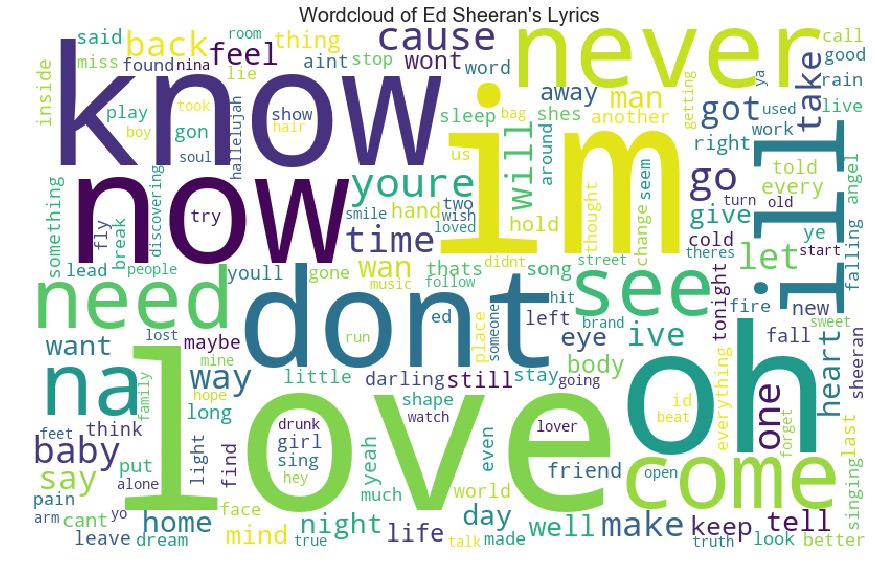

In [13]:
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(width=800, height=500, background_color="white", 
    max_words=175, collocations=False, relative_scaling = 0.8).generate(wc_string1)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=20)
plt.show()

In [14]:
# Get the word frequency as a dictionary
word_freq2 = desc_wordcloud.words_
word_freq_reps2 = []
for w in sorted(word_freq2, key=word_freq2.get, reverse=True):
    word_freq_reps2.append('%s : %0.3f' % (w, word_freq2[w]))
print(word_freq_reps2)

['im : 1.000', 'love : 0.949', 'oh : 0.734', 'know : 0.677', 'now : 0.630', 'dont : 0.541', 'ill : 0.454', 'never : 0.441', 'come : 0.370', 'na : 0.344', 'need : 0.334', 'see : 0.324', 'youre : 0.309', 'go : 0.307', 'cause : 0.294', 'one : 0.280', 'will : 0.273', 'time : 0.270', 'baby : 0.265', 'let : 0.257', 'take : 0.252', 'back : 0.248', 'way : 0.246', 'got : 0.242', 'make : 0.239', 'ive : 0.223', 'say : 0.220', 'feel : 0.203', 'heart : 0.199', 'man : 0.196', 'wan : 0.196', 'home : 0.192', 'tell : 0.183', 'day : 0.181', 'well : 0.178', 'want : 0.178', 'night : 0.174', 'eye : 0.169', 'mind : 0.169', 'give : 0.168', 'keep : 0.168', 'away : 0.164', 'life : 0.164', 'body : 0.159', 'wont : 0.159', 'thing : 0.151', 'still : 0.145', 'every : 0.135', 'hand : 0.132', 'hold : 0.131', 'friend : 0.131', 'new : 0.128', 'yeah : 0.127', 'long : 0.119', 'said : 0.118', 'right : 0.115', 'cant : 0.115', 'thats : 0.112', 'put : 0.112', 'song : 0.110', 'fall : 0.110', 'find : 0.104', 'little : 0.104', 

Now that `collocations` is turned off. Term bigrams are removed. The word `oh` is now condensed to a large probability. We now see many morphemes present in the wordcloud.

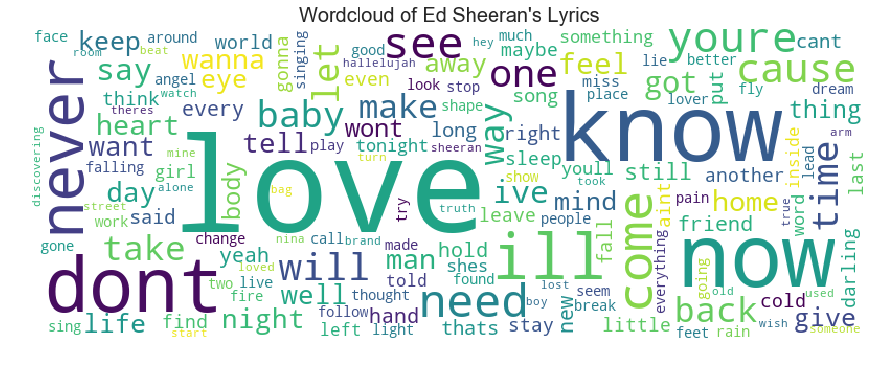

In [15]:
# Generate the string for creating the wordcloud
stemmer = PorterStemmer()
regex_tokenizer = RegexpTokenizer('[\w|\']+')
wc_string2 = ''
for song_raw in lyrics_study1_songlist[:]:
    song_tokenized = regex_tokenizer.tokenize(song_raw)
    song_stemmed = [re.sub('\'', '', t).lower() for t in song_tokenized 
                    if len(re.sub('\'', '', t).lower()) > 2]
    wc_string2 = wc_string2 + ' '.join(song_stemmed)
    
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(width=800, height=300, background_color="white", 
    max_words=150, collocations=False, relative_scaling = 1).generate(wc_string2)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=20)
plt.show()    

In [16]:
# Get the word frequency as a dictionary
word_freq2 = desc_wordcloud.words_
word_freq_reps2 = []
for w in sorted(word_freq2, key=word_freq2.get, reverse=True):
    word_freq_reps2.append('%s : %0.2f' % (w, word_freq2[w]))
print(word_freq_reps2)

['love : 1.00', 'know : 0.71', 'now : 0.67', 'dont : 0.57', 'ill : 0.48', 'never : 0.47', 'come : 0.39', 'need : 0.35', 'see : 0.34', 'youre : 0.32', 'cause : 0.31', 'one : 0.30', 'will : 0.29', 'time : 0.29', 'baby : 0.28', 'let : 0.27', 'take : 0.26', 'back : 0.26', 'way : 0.26', 'make : 0.25', 'ive : 0.24', 'say : 0.23', 'got : 0.23', 'feel : 0.22', 'heart : 0.21', 'man : 0.21', 'wanna : 0.21', 'home : 0.20', 'tell : 0.19', 'day : 0.19', 'well : 0.19', 'want : 0.19', 'night : 0.18', 'eye : 0.18', 'give : 0.18', 'mind : 0.18', 'keep : 0.18', 'away : 0.17', 'life : 0.17', 'body : 0.17', 'wont : 0.17', 'thing : 0.16', 'still : 0.15', 'every : 0.14', 'hand : 0.14', 'friend : 0.14', 'hold : 0.14', 'new : 0.14', 'yeah : 0.13', 'long : 0.13', 'said : 0.12', 'cant : 0.12', 'right : 0.12', 'thats : 0.12', 'put : 0.12', 'fall : 0.12', 'song : 0.12', 'find : 0.11', 'little : 0.11', 'leave : 0.11', 'maybe : 0.11', 'gonna : 0.11', 'think : 0.11', 'even : 0.11', 'stay : 0.10', 'another : 0.10', '

In [17]:
print(len(set((wc_string2.split()))))

4354
